In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FAA_data = pd.read_csv("../../data/FAA_data/Maintenance_Text_data.csv")

In [29]:
FAA_data.head()

,Unnamed: 0,c5,c119,c78,c80,c86,c77,c79,c81,c85,...,c135,c137,c146,c148,c150,c154,c161,c163,c183,c191
0,667,19750315005389A,TAILWHEEL COCKED RIGHT PRIOR TO TKOF. ...,AU,V,,Attempt Operation Wi,Other/Miscellaneous,Pilot-In-Command,,...,,,UNDER 12501 LBS,MONOPLANE-HIGH WING/PARA WING,POWERED,,,,,
1,1065,19750419011349A,TOW PLANE BECAME AIRBORNE THEN SETTLED.STUDENT...,ME,V,,Fail/Incorrect Use M,Other/Miscellaneous,Pilot-In-Command,,...,,,UNDER 12501 LBS,KITE/SAILWING,NONPOWERED,,,,,
2,2721,19751029037799A,"2ND ILS APCH,ACFT'S G/S INOP.LOM TUNED TO WRON...",AU,Z,IP,Attempt Operation Wi,Weather,Pilot-In-Command,Improper Inst Proc T,...,,,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,,,,,
3,3067,19751209037899A,PLT NOTED SOFT R BRAKE PEDAL DRG TAXI TO TKOF....,AU,V,,Attempt Operation Wi,Other/Miscellaneous,Pilot-In-Command,,...,,,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,,,,,
4,3637,19750818025579A,TAXI OFF HARD SFC DUE TFC R MAIN GR BROKE THRO...,AF,H,,Improper Maintenance,Hidden Hazardous Obj,Pilot-In-Command,,...,,,UNDER 12501 LBS,MONOPLANE-HIGH WING/PARA WING,POWERED,,,,,


In [30]:
textcol = "c119"
text_data = FAA_data[textcol]

In [31]:
text_data

0       TAILWHEEL COCKED RIGHT PRIOR TO TKOF.         ...
1       TOW PLANE BECAME AIRBORNE THEN SETTLED.STUDENT...
2       2ND ILS APCH,ACFT'S G/S INOP.LOM TUNED TO WRON...
3       PLT NOTED SOFT R BRAKE PEDAL DRG TAXI TO TKOF....
4       TAXI OFF HARD SFC DUE TFC R MAIN GR BROKE THRO...
                              ...                        
2758    (-23) A/C RELOCATED TO NEW HANGAR TO CHECK SIZ...
2759    (-23) ON 2/23/08 @ APPROXIMATELY 2130 DURING T...
2760    (-23) PILOT TOOK OFF FOR LEESBURG AIRPORT AND ...
2761    (-23) OWNER FORGOT TO FASTEN THE LOWER LEFT 4 ...
2762    (-23) THE AIRCRAFT EXPERIENCED SEVERE TURBULAN...
Name: c119, Length: 2763, dtype: object

#### Find N/A entries, get overall idea entry makeup

In [32]:
# N/A entries
if len(text_data.dropna()) != len(text_data):
    print(f'{len(text_data) - len(text_data.dropna())} N/A entries')
else:
    print('No N/A entries')

No N/A entries


In [33]:
# Hmm let's check that
for irow in range(len(text_data)):
    if len(text_data[irow].split()) < 2:
        print(f'{irow}. {text_data[irow]}')

# Definitely empty!

11.                                                                                                                    
17.                                                                                                                    
19.                                                                                                                    
46.                                                                                                                    
85.                                                                                                                    
127.                                                                                                                    
133.                                                                                                                    
139.                                                                                                                    
140.                                 

Text(0, 0.5, 'Num Occurances')

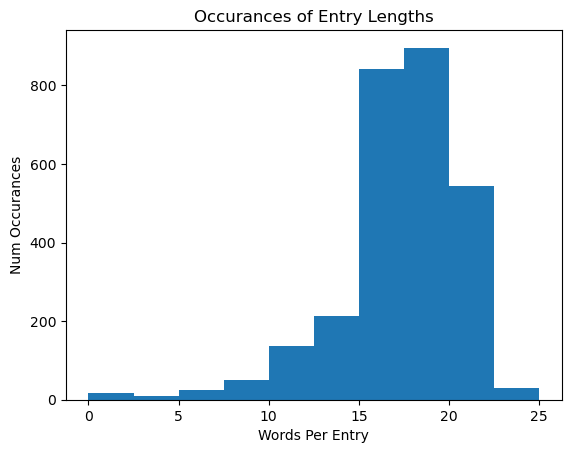

In [10]:
# Num words in each entry
entry_lengths = [len(entry.split()) for entry in text_data]
fig, ax = plt.subplots(1,1)
ax.hist(entry_lengths)
ax.set_title("Occurances of Entry Lengths")
ax.set_xlabel("Words Per Entry")
ax.set_ylabel("Num Occurances")

Number of low frequency words (appearing once) : 4040
Number of mid frequency words (appearing between 1-100 times) : 2663
Number of high frequency words (appearing 100+ times) : 63


Text(0, 0.5, 'Num Words with X Repetitions')

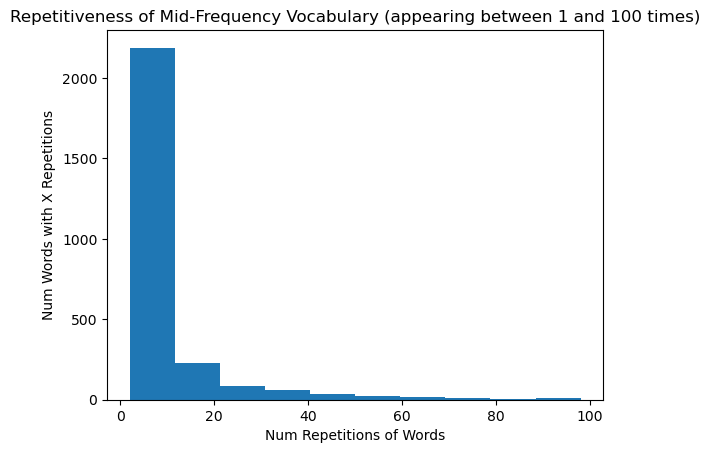

In [31]:
# Repeated words
word_counts = {}
for entry in text_data:
    for word in entry.split():
        word_counts[word] = word_counts.get(word, 0) + 1

low_freqs = {word : word_counts[word] for word in word_counts if word_counts[word] == 1}
middle_freqs = {word : word_counts[word] for word in word_counts if word_counts[word] > 1 and word_counts[word] < 100}
high_freqs = {word : word_counts[word] for word in word_counts if word_counts[word] >= 100}

print(f"Number of low frequency words (appearing once) : {len(low_freqs.values())}")
print(f"Number of mid frequency words (appearing between 1-100 times) : {len(middle_freqs.values())}")
print(f"Number of high frequency words (appearing 100+ times) : {len(high_freqs.values())}")

fig, ax = plt.subplots(1,1)
ax.hist([reps for reps in middle_freqs.values() if reps > 1])
ax.set_title("Repetitiveness of Mid-Frequency Vocabulary (appearing between 1 and 100 times)")
ax.set_xlabel("Num Repetitions of Words")
ax.set_ylabel("Num Words with X Repetitions")

In [32]:
print(high_freqs)

{'RIGHT': 152, 'TO': 1253, 'IN': 818, 'DUE': 208, 'OFF': 419, 'OF': 519, 'A': 669, 'OUT': 124, 'ON': 1464, 'NOSE': 236, 'STRUCK': 181, 'WAS': 466, 'NOT': 385, 'FOR': 184, 'WITH': 326, 'WHEN': 118, 'LEFT': 206, 'OIL': 252, 'AFTER': 447, 'UP': 108, 'DURING': 314, 'NO': 146, 'CONTROL': 160, 'FROM': 246, 'CAP': 105, 'HAD': 242, 'FUEL.': 150, 'LANDING': 301, 'ENGINE': 657, 'WATER': 248, 'POWER': 223, 'FOUND': 263, 'FUEL': 521, 'TAKEOFF': 309, 'UNABLE': 118, 'AND': 786, 'LOST': 299, 'GEAR': 447, 'THE': 1122, 'PILOT': 721, 'FAILED': 307, 'AT': 378, 'AIRCRAFT': 459, 'TAKEOFF.': 285, 'LANDED': 316, 'CAME': 111, 'FLIGHT.': 111, 'LANDING.': 212, 'QUIT': 150, 'WHILE': 107, 'AN': 123, 'FLIGHT': 167, 'RAN': 125, 'RUNWAY': 196, 'INTO': 166, 'HIT': 148, 'DOOR': 223, 'RUNWAY.': 161, 'BY': 148, 'DEPARTED': 127, 'HE': 108, 'NARRATIVE:': 129, '(-23)': 407}


#### Check Non-Alpha Data

In [41]:
number_words = {word : word_counts[word] for word in word_counts if any(char.isdigit() for char in word)}
for word in number_words:
    if number_words[word] > 5:
        print(f"{word} : {number_words[word]}")

200 : 9
2 : 19
4 : 12
3 : 15
5 : 8
180 : 9
1 : 6
10 : 8
300 : 6
30 : 7
NR2 : 7
(.4)THE : 25
1, : 7
21, : 8
1995, : 6
14, : 8
20, : 6
(-23) : 407
1996, : 9
16, : 7
1997, : 11
6, : 6
(.19) : 16
22, : 6
(.4) : 22
(.19)ON : 9
1998, : 16
26, : 7
15, : 7
(-23)THE : 6
(-5) : 10
17, : 6
19, : 7
1999, : 12
27, : 6
2000, : 9
(-23)ON : 9
5, : 6
2001, : 9
2002, : 7
2003, : 8
2003 : 7
2004, : 9
2005, : 6


In [60]:
# There do seem to be part numbers, esp. starting with N

for word in number_words:
    if word[0] == 'N':
        print(f"{word} : {number_words[word]}")

N42807 : 1
N7930C : 1
NR2 : 7
N106DA : 1
N184AW. : 1
NR3 : 3
N#92QS, : 1
NR1 : 4
N356QS, : 1
N814AA : 1
N8011Z, : 1
N5123, : 1
N2750F, : 1
N7016M, : 1
N4390F : 1
N1549U : 1
NR4 : 2
N363BE : 1
N2114J : 1
N4517T : 1
NARRATIVE:I96SW010017 : 1
N2323F, : 1
N231CS, : 1
N2171N : 1
N253TM, : 1
N76737, : 1
N1JX, : 1
N19DG, : 1
N7368R : 1
N956S, : 1
N303GV, : 1
N83GA, : 1
N5459R, : 1
N9401P : 1
N564PC, : 1
N15428, : 1
N1319E, : 1
N789 : 1
N18BZ : 1
N307DW, : 1
N9067G, : 1
N3256V, : 1
N3240U, : 1
N21466, : 1
N492UE, : 1
N267TC, : 1
N73533, : 1
N3500X, : 1
N8968B, : 1
N305EC : 1
N6370L, : 1
N8883C, : 1
N810EX, : 1
N51MJ, : 1
N244AE, : 1
N738UA, : 1
N8092S, : 1
N789SL : 1
N838MA : 1
N7991Y : 1
N711BN, : 1
N153JC, : 1
N1027N, : 1
N26952, : 1
N88CP : 1
N898CB, : 1
N9266V, : 1
NR5 : 1
N21837, : 1
N9304F, : 1
N832JS, : 1
N41. : 1
N4561C, : 1
N527SS, : 1
N2313L, : 1
N4156Y, : 1
N9023Q, : 1
N1959F : 1
N81SK, : 1
N4754R, : 1
N9187V. : 1
N4628C : 1
N467YV : 1
N800RH : 1
N947WP : 1
N878R, : 1
N2709R : 1
N51

There do seem to be part numbers in here

#### Find coreference words

In [37]:
pronouns = ["IT", "HIM", "HER", "THEM", "HE", "SHE", "THEY", "YOU", "WE", "US"]
for pronoun in pronouns:
    if pronoun in word_counts.keys():
        print(f"{pronoun} : {word_counts[pronoun]}")

IT : 46
HIM : 2
HER : 1
THEM : 2
HE : 108
SHE : 2
THEY : 3
YOU : 1
US : 1


#### Compare to MaintNet data

In [4]:
maintnet_data = pd.read_csv("../../data/MaintNet_data/Aircraft_Annotation_DataFile.csv")
maintnet_abbrevs = pd.read_csv("../../data/MaintNet_data/Aviation_Abbreviation_Dataset.csv")
maintnet_grammar = pd.read_csv("../../data/MaintNet_data/Aviation_grammar_Dataset.csv")
maintnet_terms = pd.read_csv("../../data/MaintNet_data/Aviation_TermBanks_Dataset.csv")

#### Repeat EDA process with MaintNet Data

Number of low frequency words (appearing once) : 1448
Number of mid frequency words (appearing between 1-100 times) : 1754
Number of high frequency words (appearing 100+ times) : 105


Text(0, 0.5, 'Num Words with X Repetitions')

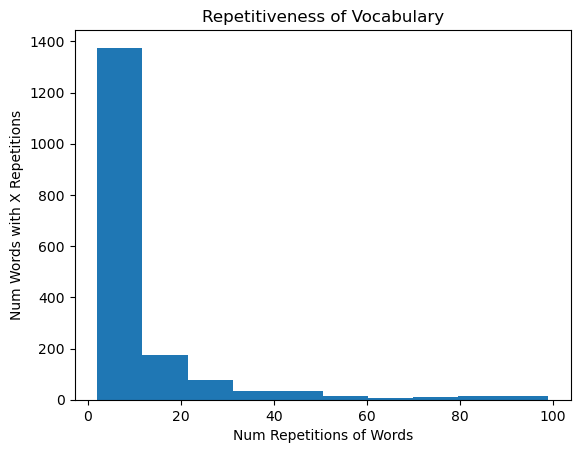

In [56]:
maint_text = list(maintnet_data["PROBLEM"]) + list(maintnet_data["ACTION"])

# Repeated words
maint_word_counts = {}
for entry in maint_text:
    for word in entry.split():
        maint_word_counts[word] = maint_word_counts.get(word, 0) + 1
        
maint_low_freqs = {word : maint_word_counts[word] for word in maint_word_counts if maint_word_counts[word] == 1}
maint_middle_freqs = {word : maint_word_counts[word] for word in maint_word_counts if maint_word_counts[word] > 1 and maint_word_counts[word] < 100}
maint_high_freqs = {word : maint_word_counts[word] for word in maint_word_counts if maint_word_counts[word] >= 100}

print(f"Number of low frequency words (appearing once) : {len(maint_low_freqs.values())}")
print(f"Number of mid frequency words (appearing between 1-100 times) : {len(maint_middle_freqs.values())}")
print(f"Number of high frequency words (appearing 100+ times) : {len(maint_high_freqs.values())}")

fig, ax = plt.subplots(1,1)
ax.hist([reps for reps in maint_middle_freqs.values() if reps > 1])
ax.set_title("Repetitiveness of Vocabulary")
ax.set_xlabel("Num Repetitions of Words")
ax.set_ylabel("Num Words with X Repetitions")

In [58]:
maint_number_words = {word : maint_word_counts[word] for word in maint_word_counts if any(char.isdigit() for char in word)}
for word in maint_number_words:
    if maint_number_words[word] > 5:
        print(f"{word} : {maint_number_words[word]}")

#2 : 1582
4 : 914
#3 : 1172
#4 : 1005
#1, : 140
2 : 196
3 : 546
#1 : 647
2, : 113
#2, : 220
1 : 73
1, : 30
#2. : 6
4. : 16
3, : 97
3. : 11
(40/80). : 7
#4, : 12
#3. : 8
#3, : 41
#4. : 10
30 : 7
4, : 7
1600 : 6
20/80. : 8
2000 : 9
(0/80), : 7
2720 : 6
1000 : 6
8 : 9


In [59]:
maint_number_words.keys()

dict_keys(['#2', '4', '#3', '#4', '#1,', '2', '3', '#1', '1200', '2,', '6', '970', '32', '33', '#2,', '3400', '1', '3200,', '24', '1,', '180', '#2.', '1700', '34', '4.', '4TH', '3,', '5500', '+7,', '#1/3', '1150', '100', '150', '300', '3.', '(40/80).', '3300', '#4,', '2640', '2600', '4).', '1450.', '#3.', '1800', '2720,', '2800.', '1300.', '30/80.', '2760', '#3,', '(20/80', '#1.', '#6', '#4.', '200', '250', '1225', '1/2', '(54/80).', 'N1', '4%', '350', '90', '35/80.', '800', '1700.', '2730', '2770', '30', '2720.', '4,', '7', '10', '1600', '20"', '15/80.', '#7', '2710', '2700', '35.', '1560,', '2840', '3275', "2',", '(50/80).', 'N2', '720.', '2750', '3-4', '1400', '300+', '(30/80).', '17L', '2450', "2000'", '#2/4', '(55', '2740.', '780', '15/80', '#12', 'D37', '25LBS.', '5/80.', '20/80.', '2000', '(0/80),', '55', '(50', '#3/2', '2720', '(30', '(2', '(58/80).', '150*F.', '1000,', '.031".', '.032".', '.033".', '.035".', '3+', '1000', '1ST', '.033").', '.035").', '.034").', '1300', '3350',

In [61]:
pronouns = ["IT", "HIM", "HER", "THEM", "HE", "SHE", "THEY", "YOU", "WE", "US"]
for pronoun in pronouns:
    if pronoun in maint_word_counts.keys():
        print(f"{pronoun} : {maint_word_counts[pronoun]}")

IT : 11


#### Find Word Commonality Between FAA Data and MaintNet Data

Text(0.5, 1.0, 'Common Words Between FAA and MaintNet,\n(excluding words appearing under 5 times in either set)')

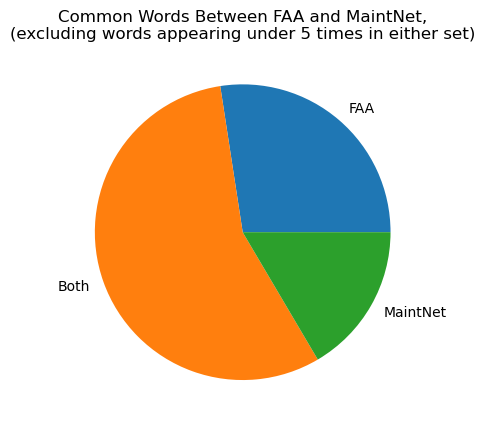

In [77]:
thresh = 5
just_FAA = [word for word in word_counts if word not in maint_word_counts and word_counts[word] >= thresh]
just_maint = [word for word in maint_word_counts if word not in word_counts and maint_word_counts[word] >= thresh]
overlap = [word for word in maint_word_counts if word in word_counts]

fig, ax = plt.subplots(1,1)
ax.pie([len(just_FAA), len(overlap), len(just_maint)], labels=["FAA", "Both", "MaintNet"])
ax.set_title(f"Common Words Between FAA and MaintNet,\n(excluding words appearing under {thresh} times in either set)")

### You can see by playing around with the threshhold value that 'Both' goes up when you heighten the threshhold. this is not very informative

#### Check Other Files: abbrevs, grammar, and termbanks

In [85]:
abbrevs = maintnet_abbrevs["Abbreviated"]

for abbrev in abbrevs:
    if abbrev.upper() in word_counts:
        print(f"{abbrev.upper()} : {word_counts[abbrev.upper()]}")

AGL : 8
AF : 3
BATT : 1
CO : 1
CARB : 28
CH : 1
CK : 2
CO : 1
CYL : 3
DMG : 1
ENG : 4
FAA : 2
FLT : 4
FL : 2
HYD : 1
ID : 1
INOP : 7
LDG : 4
MI : 2
MAG : 5
MAN : 3
EWR : 1
ND : 1
OPS : 2
PN : 1
Q : 1
RES : 2
TEMP : 3


In [87]:
grammar_words = maintnet_grammar["Word"]

for word in grammar_words:
    if word.upper() in word_counts:
        print(f"{word.upper()} : {word_counts[word.upper()]}")

ENGINE : 657
CYLINDER : 3
GASKET : 1
HYDRAULIC : 27
MAGNETOS : 1
PRESSURE : 36
IGNITION : 3
FORWARD : 21
EXTERNAL : 9
LOWER : 11
MAINTENANCE : 41
BATTERY : 28
BROKE : 32
CONTROL : 160
QUIT : 150
CHECK : 57
ALTERNATOR : 15
TURN : 35
CYLINDER : 3
OPEN : 93
UPPER : 13
TIGHTEN : 1
CHANNEL : 1
LOW : 59
EXTERNAL : 9
SERVICE : 7
FAILED : 307
SUDDENLY : 1
LOSS : 59
EDGE : 5
NORMAL : 14
WEIGHT : 3
FLIGHT : 167
AIRCRAFT : 459
VIBRATION : 16


In [89]:
tb_words = maintnet_termbank["Word"]

for word in tb_words:
    if word.upper() in word_counts:
        print(f"{word.upper()} : {word_counts[word.upper()]}")

NameError: name 'maintnet_termbank' is not defined